Import the dependencies or(modules and libraries)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data coolection and analysis

In [ ]:
#loading the mall data
data=pd.read_csv('/content/Mall_Customers.csv')
#read 5 colums of the data
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#finding the size of the dataset
print('size of the dataset')
data.shape


size of the dataset


(200, 5)

In [ ]:
#information about the dataset
print('information about the dataset')
data.info()
print('\n')

#finding the missing values in the dataset
print('check for missing values')
data.isnull().sum()



information about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


check for missing values


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

choosing the features

In [ ]:
features=['Annual Income (k$)','Spending Score (1-100)']
X=data[features]
print(X)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


choose correct number of clusters

WCSS -->within cluster sum of squares

In [ ]:
#finding the valur for differnet number of clusters

wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=56)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

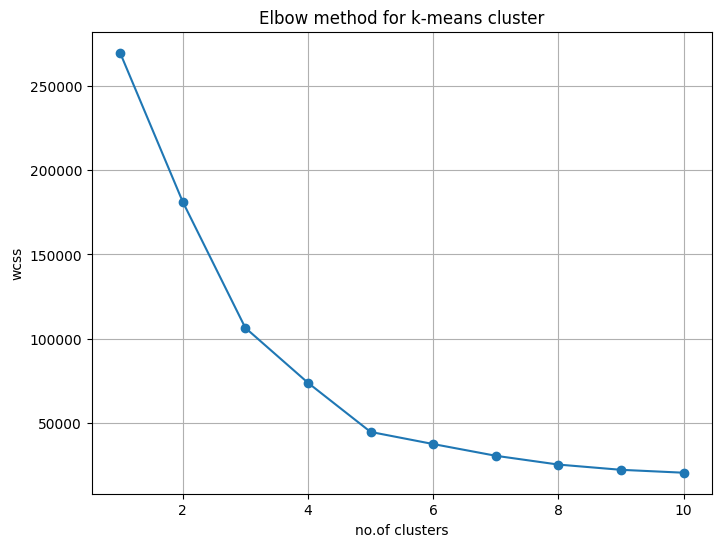

In [ ]:
#plot the elbow graph
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss,marker='o',linestyle='-')
plt.xlabel('no.of clusters')
plt.ylabel('wcss')
plt.title('Elbow method for k-means cluster')
plt.grid(True)
plt.show()

optimum number of clusters=5

Training the k-means cluster model

In [ ]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
Y=kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
"""assign cluster labels to each data point
data['cluster_labels']=kmeans.labels_
print(data)"""

"assign cluster labels to each data point\ndata['cluster_labels']=kmeans.labels_\nprint(data)"

visualize the clusters using scatter plot


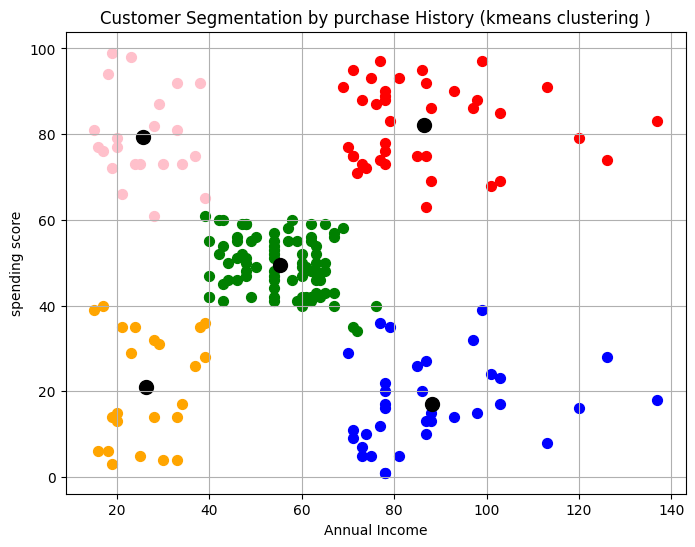

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X.loc[Y==0, X.columns[0]], X.loc[Y==0, X.columns[1]], s=50, c='blue', label='cluster 1') # Use .loc to index with boolean array and column names
plt.scatter(X.loc[Y==1, X.columns[0]], X.loc[Y==1, X.columns[1]], s=50, c='green', label='cluster 2')
plt.scatter(X.loc[Y==2, X.columns[0]], X.loc[Y==2, X.columns[1]], s=50, c='red', label='cluster 3')
plt.scatter(X.loc[Y==3, X.columns[0]], X.loc[Y==3, X.columns[1]], s=50, c='pink', label='cluster 4')
plt.scatter(X.loc[Y==4, X.columns[0]], X.loc[Y==4, X.columns[1]], s=50, c='orange', label='cluster 5')

#plot the centriods
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black',s=100,label='centroids')

plt.title('Customer Segmentation by purchase History (kmeans clustering )')
plt.xlabel('Annual Income')
plt.ylabel('spending score')
plt.grid(True)
plt.show()